Searching for DICOM files...


100%|██████████| 2/2 [00:00<00:00, 398.05it/s]


Found 6 DICOM files


Processing DICOM files:  40%|████      | 2/5 [00:00<00:00, 17.93it/s]

Error processing Images_Test\dicom\3000\Reconstructed_DaTSCAN\2011-01-20_16_28_47.0\I323662\PPMI_3000_NM_Reconstructed_DaTSCAN_Br_20120814154829508_1_S117534_I323662.dcm: Invalid shape (91, 109, 91) for image data
Error processing Images_Test\dicom\3001\Reconstructed_DaTSCAN\2011-06-23_16_15_55.0\I341192\PPMI_3001_NM_Reconstructed_DaTSCAN_Br_20121019114104960_1_S115975_I341192.dcm: Invalid shape (91, 109, 91) for image data
Error processing Images_Test\dicom\3001\Reconstructed_DaTSCAN\2012-04-06_14_47_26.0\I358111\PPMI_3001_NM_Reconstructed_DaTSCAN_Br_20130206130021338_1_S151488_I358111.dcm: Invalid shape (91, 109, 91) for image data
Error processing Images_Test\dicom\3001\Reconstructed_DaTSCAN\2013-05-03_12_11_46.0\I419651\PPMI_3001_NM_Reconstructed_DaTSCAN_Br_20140410130149873_1_S215843_I419651.dcm: Invalid shape (91, 109, 91) for image data


Processing DICOM files: 100%|██████████| 5/5 [00:00<00:00, 26.77it/s]

Error processing Images_Test\dicom\3001\Reconstructed_DaTSCAN\2014-04-25_14_34_54.0\I449434\PPMI_3001_NM_Reconstructed_DaTSCAN_Br_20141023120953975_1_S231143_I449434.dcm: Invalid shape (91, 109, 91) for image data


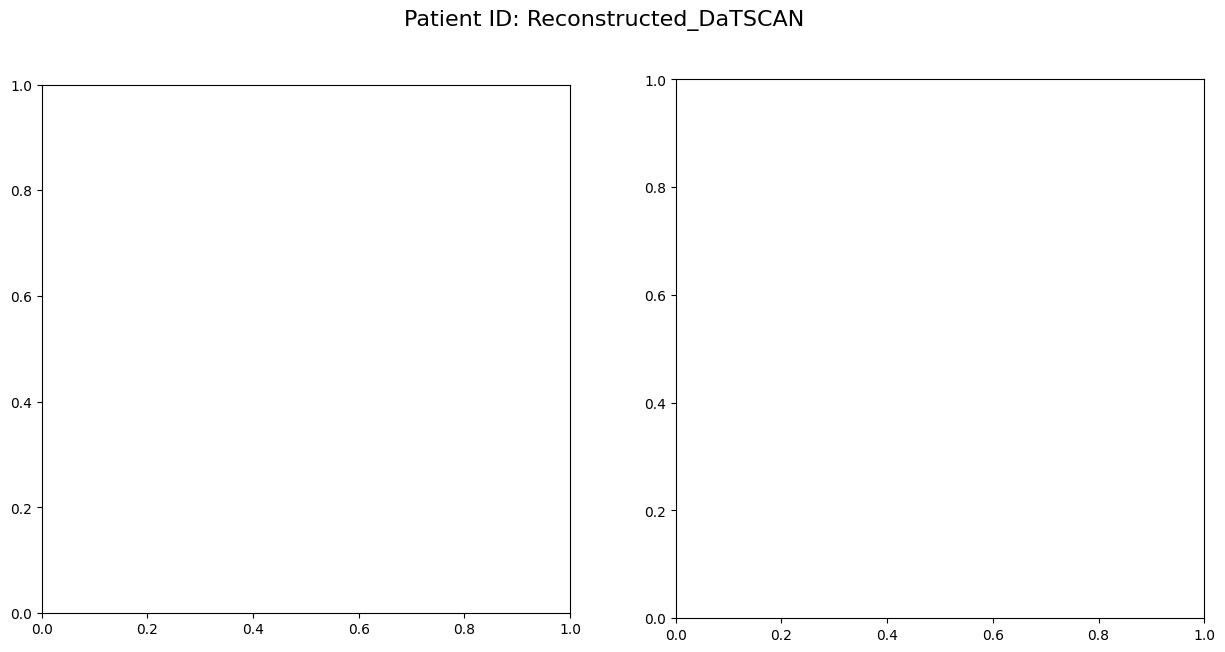

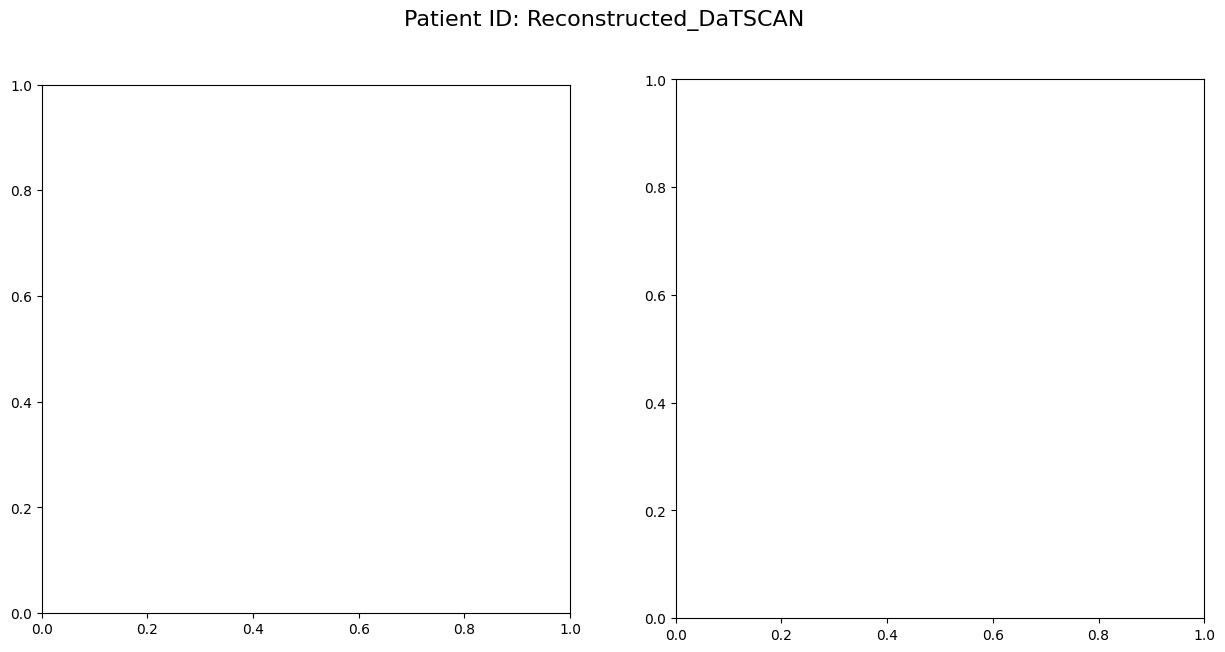

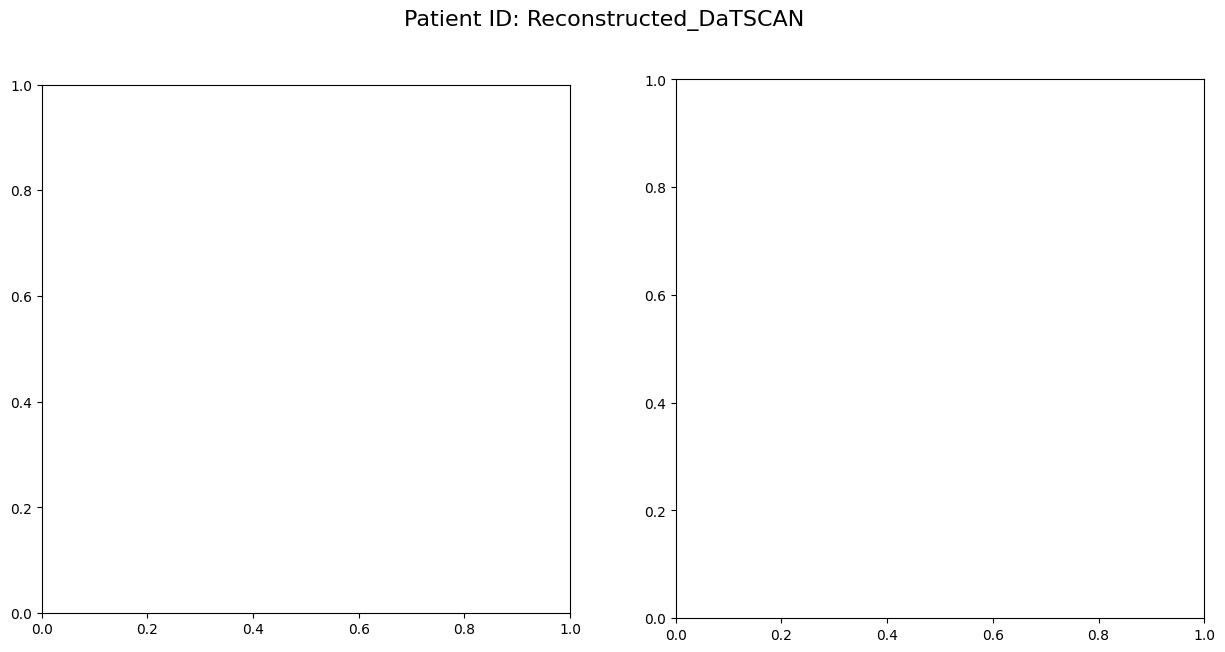

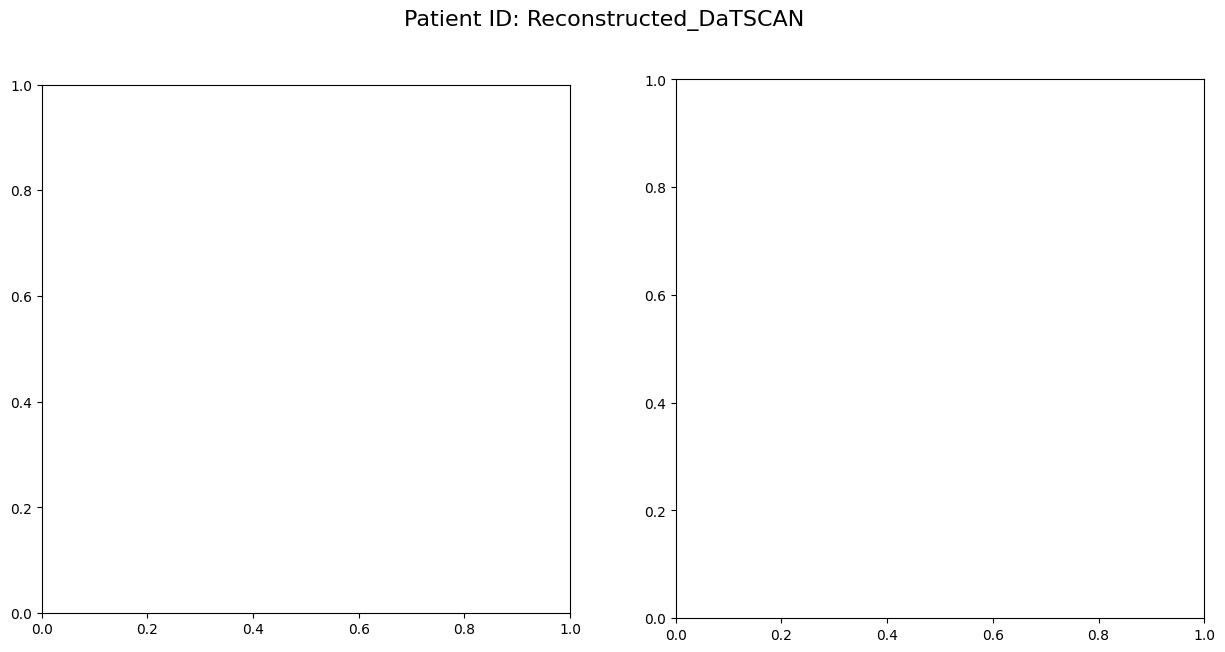

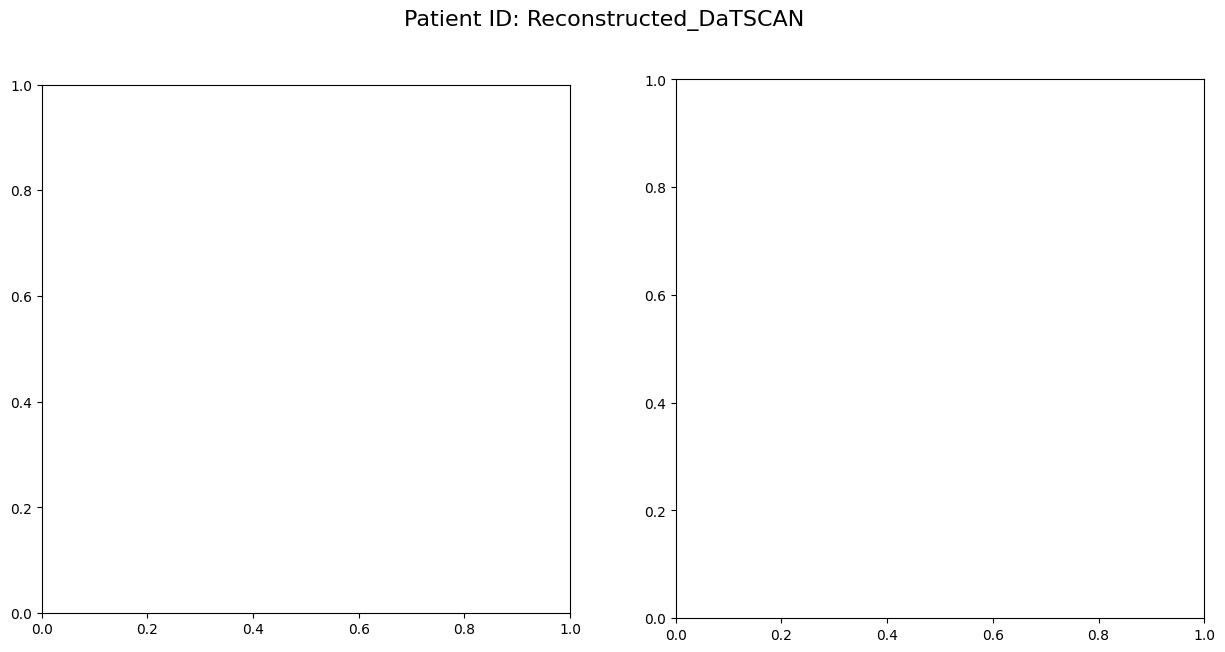

In [1]:
import os
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

class DICOMViewer:
    def __init__(self, base_path):
        """
        Initialize the DICOM viewer with the base path containing patient folders
        
        Parameters:
        -----------
        base_path : str
            Path to the directory containing patient folders with DICOM images
        """
        self.base_path = Path(base_path)
        self.dicom_files = []
        
    def find_dicom_files(self):
        """
        Recursively search for DICOM files in all patient folders
        """
        print("Searching for DICOM files...")
        for patient_folder in tqdm(list(self.base_path.iterdir())):
            if patient_folder.is_dir():
                # Recursively search for files with .dcm extension
                for file_path in patient_folder.rglob("*"):
                    if file_path.is_file() and file_path.suffix.lower() in ['.dcm', '.ima']:
                        self.dicom_files.append(file_path)
        
        print(f"Found {len(self.dicom_files)} DICOM files")
        
    def load_and_display_images(self, max_images=None):
        """
        Load and display DICOM images
        
        Parameters:
        -----------
        max_images : int, optional
            Maximum number of images to display. If None, display all images.
        """
        if not self.dicom_files:
            self.find_dicom_files()
            
        if not self.dicom_files:
            print("No DICOM files found!")
            return
            
        files_to_process = self.dicom_files[:max_images] if max_images else self.dicom_files
        
        for dicom_path in tqdm(files_to_process, desc="Processing DICOM files"):
            try:
                # Load the DICOM file
                ds = pydicom.dcmread(dicom_path)
                
                # Get image data
                image = ds.pixel_array
                
                # Create a figure with two subplots: image and metadata
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
                fig.suptitle(f"Patient ID: {dicom_path.parts[-4]}", fontsize=16)
                
                # Display the image
                im = ax1.imshow(image, cmap='gray')
                ax1.set_title('DICOM Image')
                plt.colorbar(im, ax=ax1)
                
                # Display basic metadata
                metadata_text = (
                    f"Image Shape: {image.shape}\n"
                    f"Image Type: {getattr(ds, 'ImageType', 'N/A')}\n"
                    f"Modality: {getattr(ds, 'Modality', 'N/A')}\n"
                    f"Study Date: {getattr(ds, 'StudyDate', 'N/A')}\n"
                    f"Pixel Spacing: {getattr(ds, 'PixelSpacing', 'N/A')}\n"
                    f"Manufacturer: {getattr(ds, 'Manufacturer', 'N/A')}\n"
                )
                
                ax2.text(0.1, 0.5, metadata_text, fontsize=12, va='center')
                ax2.axis('off')
                ax2.set_title('Basic Metadata')
                
                plt.tight_layout()
                plt.show()
                
            except Exception as e:
                print(f"Error processing {dicom_path}: {str(e)}")
                continue

def main():
    # Replace with your actual path to the "dicom" folder
    dicom_base_path = "./Images_Test/dicom"
    
    # Create viewer instance
    viewer = DICOMViewer(dicom_base_path)
    
    # Find all DICOM files
    viewer.find_dicom_files()
    
    # Load and display first 5 images (you can change this number or set to None for all images)
    viewer.load_and_display_images(max_images=5)

if __name__ == "__main__":
    main()

Searching for DICOM files...


100%|██████████| 2/2 [00:00<00:00, 105.25it/s]


Found 6 DICOM files


Processing DICOM files:  60%|██████    | 3/5 [00:00<00:00, 21.53it/s]


DICOM File Information:
--------------------------------------------------
Transfer Syntax UID: 1.2.840.10008.1.2.1
Modality: NM
Image Type: ['DERIVED', 'PRIMARY', 'RECON TOMO', 'EMISSION']
Manufacturer: PMOD Technologies
Pixel Data Shape: (91, 109, 91)
Bits Allocated: 16
Bits Stored: 16
High Bit: 15
Pixel Representation: 1
Rescale Slope: N/A
Rescale Intercept: N/A
--------------------------------------------------
Error processing Images_Test\dicom\3000\Reconstructed_DaTSCAN\2011-01-20_16_28_47.0\I323662\PPMI_3000_NM_Reconstructed_DaTSCAN_Br_20120814154829508_1_S117534_I323662.dcm: Invalid shape (91, 109, 91) for image data

DICOM File Information:
--------------------------------------------------
Transfer Syntax UID: 1.2.840.10008.1.2.1
Modality: NM
Image Type: ['DERIVED', 'PRIMARY', 'RECON TOMO', 'EMISSION']
Manufacturer: PICKER
Pixel Data Shape: (91, 109, 91)
Bits Allocated: 16
Bits Stored: 16
High Bit: 15
Pixel Representation: 1
Rescale Slope: N/A
Rescale Intercept: N/A
--------

Processing DICOM files: 100%|██████████| 5/5 [00:00<00:00, 23.11it/s]


Error processing Images_Test\dicom\3001\Reconstructed_DaTSCAN\2014-04-25_14_34_54.0\I449434\PPMI_3001_NM_Reconstructed_DaTSCAN_Br_20141023120953975_1_S231143_I449434.dcm: Invalid shape (91, 109, 91) for image data


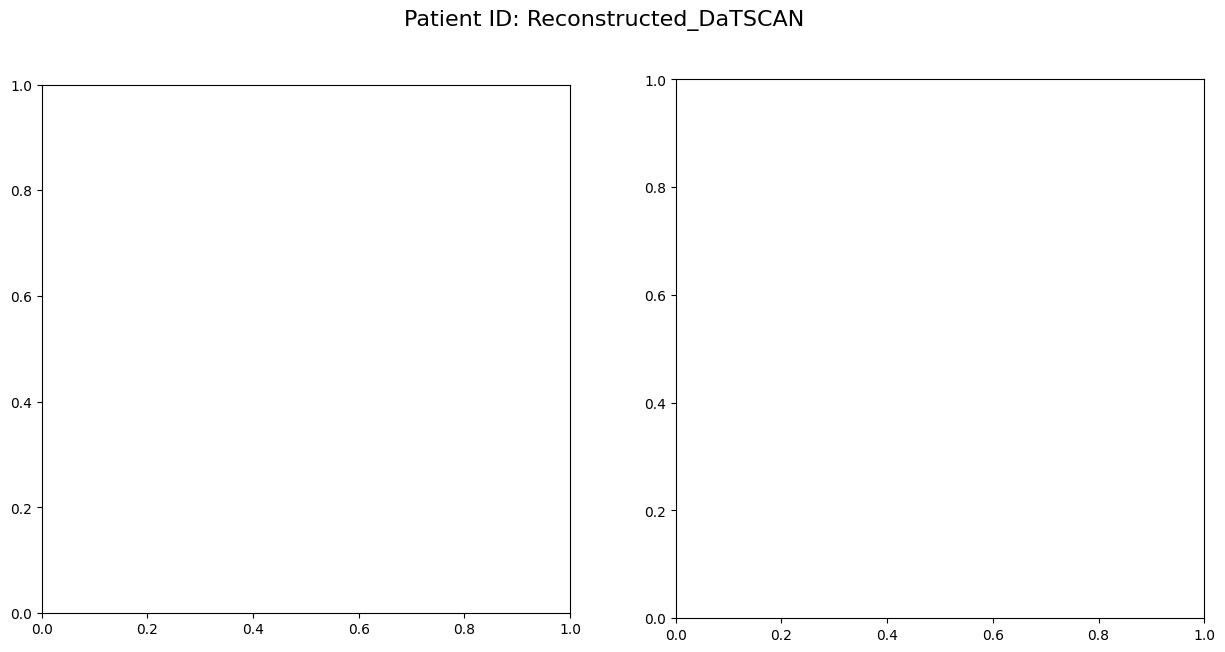

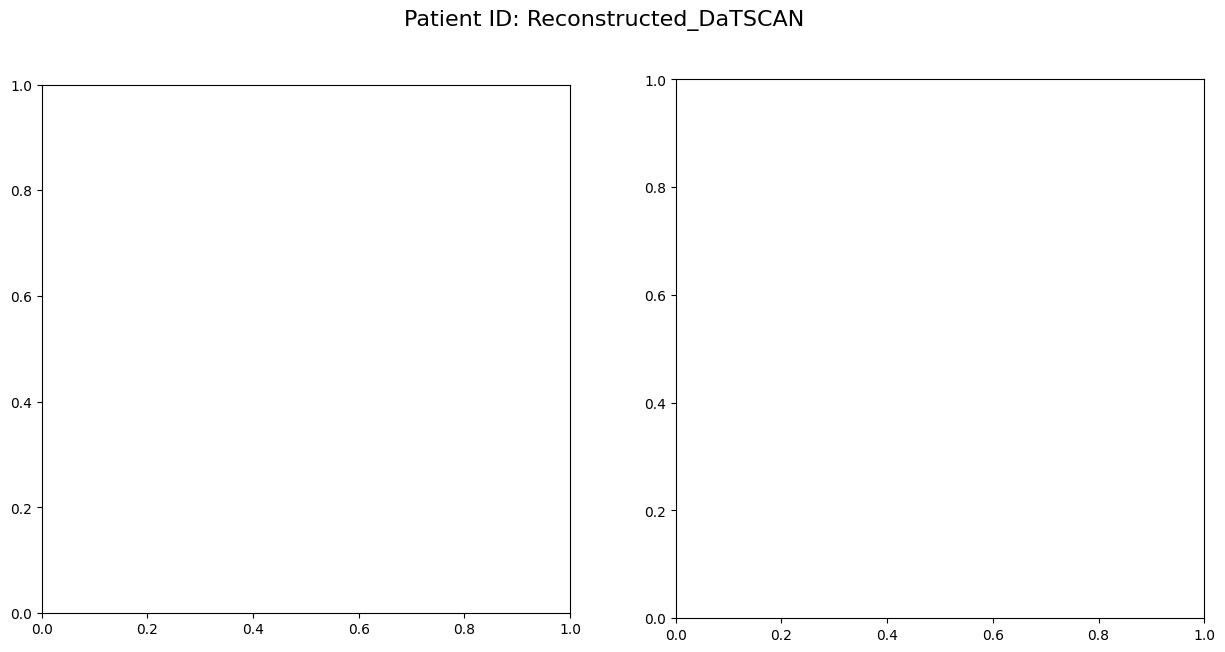

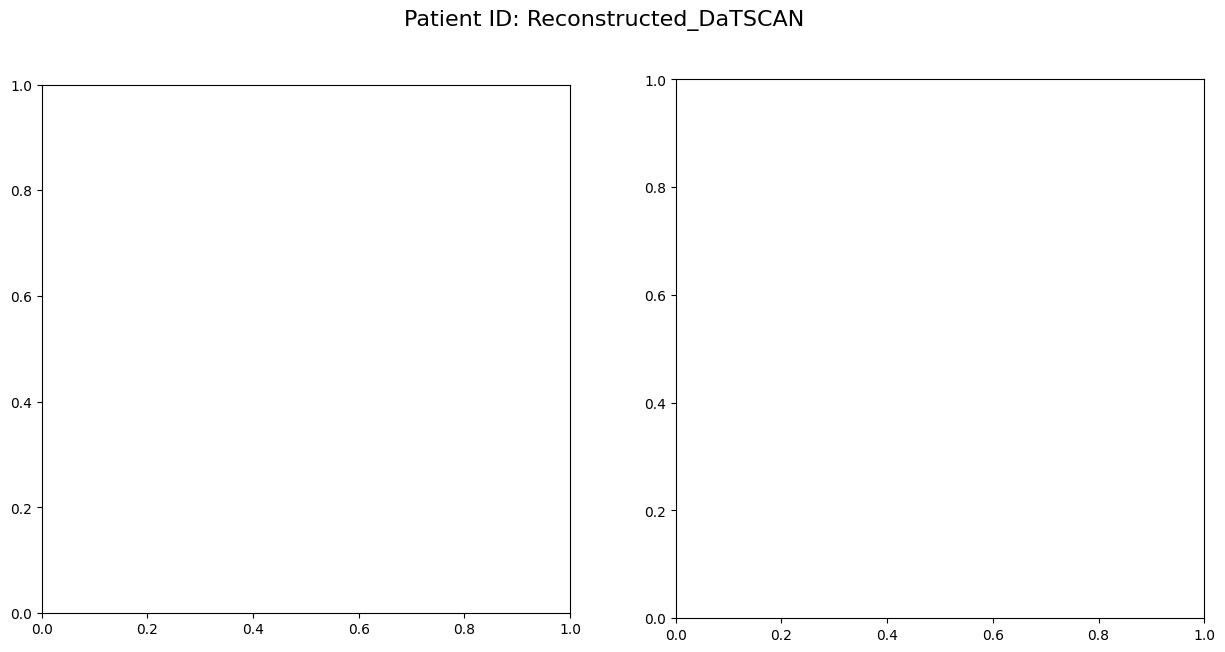

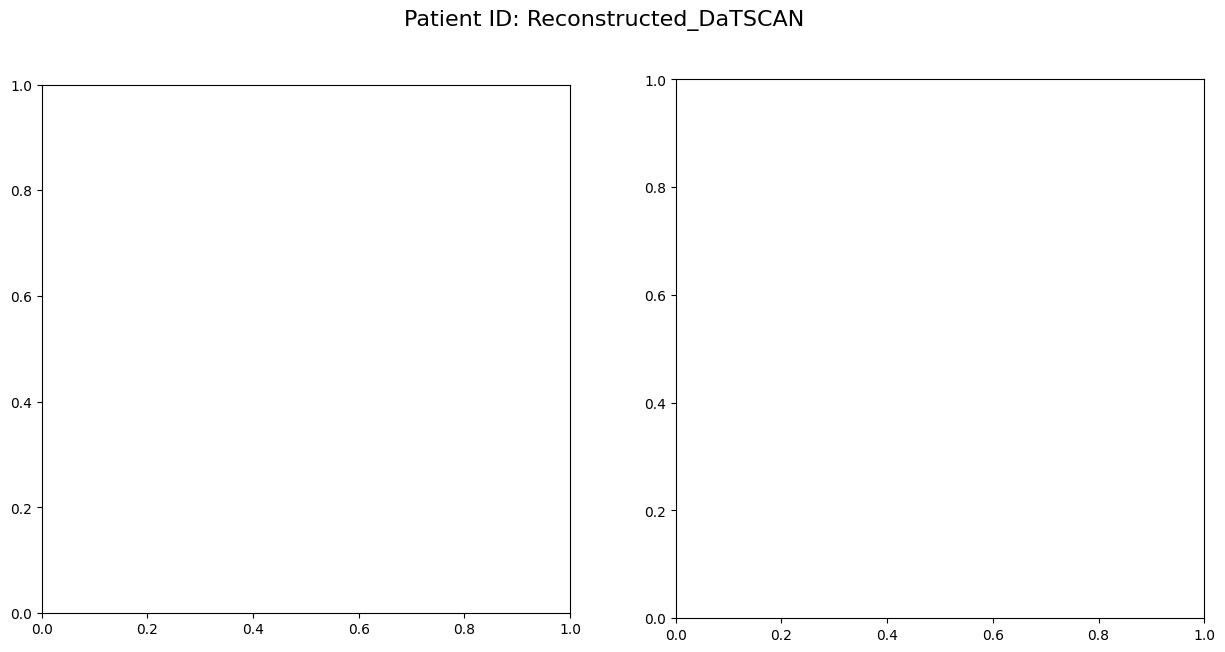

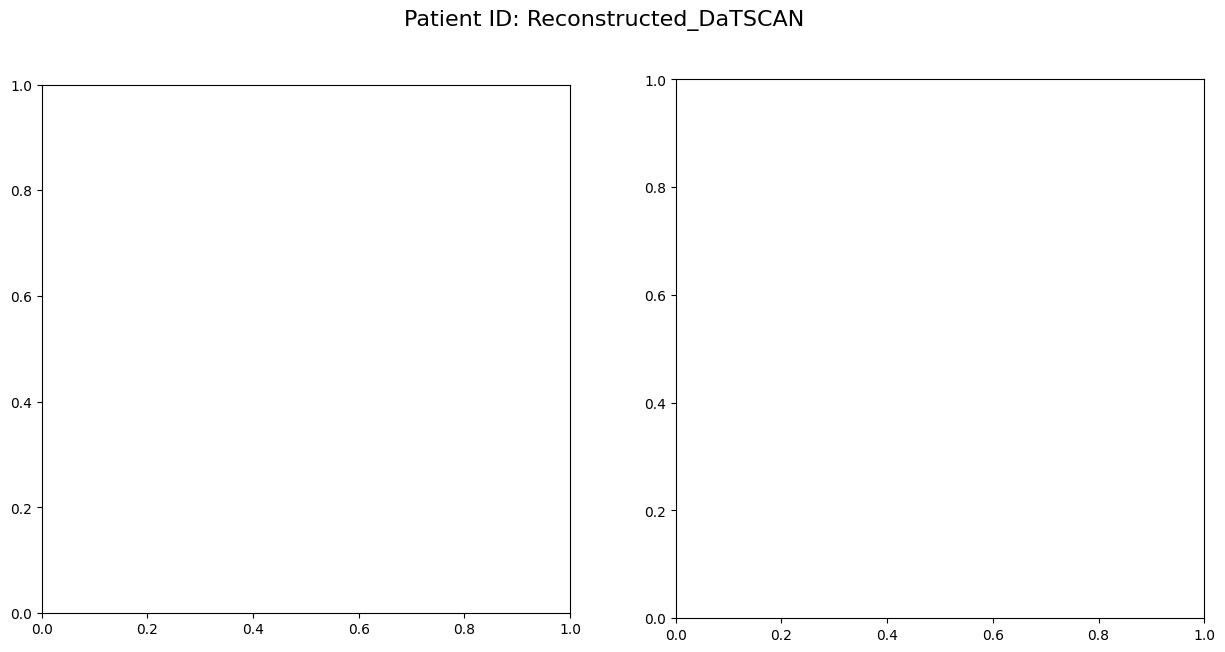

In [2]:
import os
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

class DICOMViewer:
    def __init__(self, base_path):
        """
        Initialize the DICOM viewer with the base path containing patient folders
        
        Parameters:
        -----------
        base_path : str
            Path to the directory containing patient folders with DICOM images
        """
        self.base_path = Path(base_path)
        self.dicom_files = []
        
    def find_dicom_files(self):
        """
        Recursively search for DICOM files in all patient folders
        """
        print("Searching for DICOM files...")
        for patient_folder in tqdm(list(self.base_path.iterdir())):
            if patient_folder.is_dir():
                # Recursively search for files with .dcm extension
                for file_path in patient_folder.rglob("*"):
                    if file_path.is_file() and file_path.suffix.lower() in ['.dcm', '.ima']:
                        self.dicom_files.append(file_path)
        
        print(f"Found {len(self.dicom_files)} DICOM files")
        
    def process_dicom_image(self, ds):
        """
        Process DICOM image data with proper scaling
        
        Parameters:
        -----------
        ds : pydicom.dataset.FileDataset
            The DICOM dataset
            
        Returns:
        --------
        numpy.ndarray
            Processed image data
        """
        # Get image data
        try:
            image = ds.pixel_array
            
            # Apply rescale slope and intercept if available
            if hasattr(ds, 'RescaleSlope') and hasattr(ds, 'RescaleIntercept'):
                image = image * float(ds.RescaleSlope) + float(ds.RescaleIntercept)
            
            # Normalize the image for display
            if image.max() - image.min() != 0:
                image = ((image - image.min()) / (image.max() - image.min()) * 255).astype(np.uint8)
            
            return image
            
        except Exception as e:
            print(f"Error processing pixel data: {str(e)}")
            return None

    def print_dicom_info(self, ds):
        """
        Print detailed DICOM file information for debugging
        """
        print("\nDICOM File Information:")
        print("-" * 50)
        print(f"Transfer Syntax UID: {ds.file_meta.TransferSyntaxUID}")
        print(f"Modality: {getattr(ds, 'Modality', 'N/A')}")
        print(f"Image Type: {getattr(ds, 'ImageType', 'N/A')}")
        print(f"Manufacturer: {getattr(ds, 'Manufacturer', 'N/A')}")
        print(f"Pixel Data Shape: {ds.pixel_array.shape if hasattr(ds, 'pixel_array') else 'N/A'}")
        print(f"Bits Allocated: {getattr(ds, 'BitsAllocated', 'N/A')}")
        print(f"Bits Stored: {getattr(ds, 'BitsStored', 'N/A')}")
        print(f"High Bit: {getattr(ds, 'HighBit', 'N/A')}")
        print(f"Pixel Representation: {getattr(ds, 'PixelRepresentation', 'N/A')}")
        print(f"Rescale Slope: {getattr(ds, 'RescaleSlope', 'N/A')}")
        print(f"Rescale Intercept: {getattr(ds, 'RescaleIntercept', 'N/A')}")
        print("-" * 50)
            
    def load_and_display_images(self, max_images=None, debug=True):
        """
        Load and display DICOM images
        
        Parameters:
        -----------
        max_images : int, optional
            Maximum number of images to display. If None, display all images.
        debug : bool, optional
            If True, print detailed DICOM information for debugging
        """
        if not self.dicom_files:
            self.find_dicom_files()
            
        if not self.dicom_files:
            print("No DICOM files found!")
            return
            
        files_to_process = self.dicom_files[:max_images] if max_images else self.dicom_files
        
        for dicom_path in tqdm(files_to_process, desc="Processing DICOM files"):
            try:
                # Load the DICOM file with force=True to bypass errors
                ds = pydicom.dcmread(dicom_path, force=True)
                
                if debug:
                    self.print_dicom_info(ds)
                
                # Process the image
                image = self.process_dicom_image(ds)
                
                if image is None:
                    print(f"Failed to process image from {dicom_path}")
                    continue
                
                # Create a figure with two subplots: image and metadata
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
                fig.suptitle(f"Patient ID: {dicom_path.parts[-4]}", fontsize=16)
                
                # Display the image
                im = ax1.imshow(image, cmap='gray')
                ax1.set_title('DICOM Image')
                plt.colorbar(im, ax=ax1)
                
                # Display basic metadata
                metadata_text = (
                    f"Image Shape: {image.shape}\n"
                    f"Image Type: {getattr(ds, 'ImageType', 'N/A')}\n"
                    f"Modality: {getattr(ds, 'Modality', 'N/A')}\n"
                    f"Study Date: {getattr(ds, 'StudyDate', 'N/A')}\n"
                    f"Pixel Spacing: {getattr(ds, 'PixelSpacing', 'N/A')}\n"
                    f"Manufacturer: {getattr(ds, 'Manufacturer', 'N/A')}\n"
                    f"Min/Max Values: ({image.min()}, {image.max()})\n"
                )
                
                ax2.text(0.1, 0.5, metadata_text, fontsize=12, va='center')
                ax2.axis('off')
                ax2.set_title('Basic Metadata')
                
                plt.tight_layout()
                plt.show()
                
            except Exception as e:
                print(f"Error processing {dicom_path}: {str(e)}")
                continue

def main():
    # Replace with your actual path to the "dicom" folder
    dicom_base_path = "./Images_Test/dicom"
    
    # Create viewer instance
    viewer = DICOMViewer(dicom_base_path)
    
    # Find all DICOM files
    viewer.find_dicom_files()
    
    # Load and display first 5 images with debug information
    viewer.load_and_display_images(max_images=5, debug=True)

if __name__ == "__main__":
    main()

Searching for DICOM files...


100%|██████████| 2/2 [00:00<00:00, 263.02it/s]


Found 6 DICOM files


Processing DICOM files:   0%|          | 0/1 [00:00<?, ?it/s]


DICOM File Information:
--------------------------------------------------
Transfer Syntax UID: 1.2.840.10008.1.2.1
Modality: NM
Image Type: ['DERIVED', 'PRIMARY', 'RECON TOMO', 'EMISSION']
Manufacturer: PMOD Technologies
Pixel Data Shape: (91, 109, 91)
Bits Allocated: 16
Bits Stored: 16
High Bit: 15
Pixel Representation: 1
Rescale Slope: N/A
Rescale Intercept: N/A
--------------------------------------------------


Processing DICOM files: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

Error processing Images_Test\dicom\3000\Reconstructed_DaTSCAN\2011-01-20_16_28_47.0\I323662\PPMI_3000_NM_Reconstructed_DaTSCAN_Br_20120814154829508_1_S117534_I323662.dcm: Invalid shape (91, 109, 91) for image data


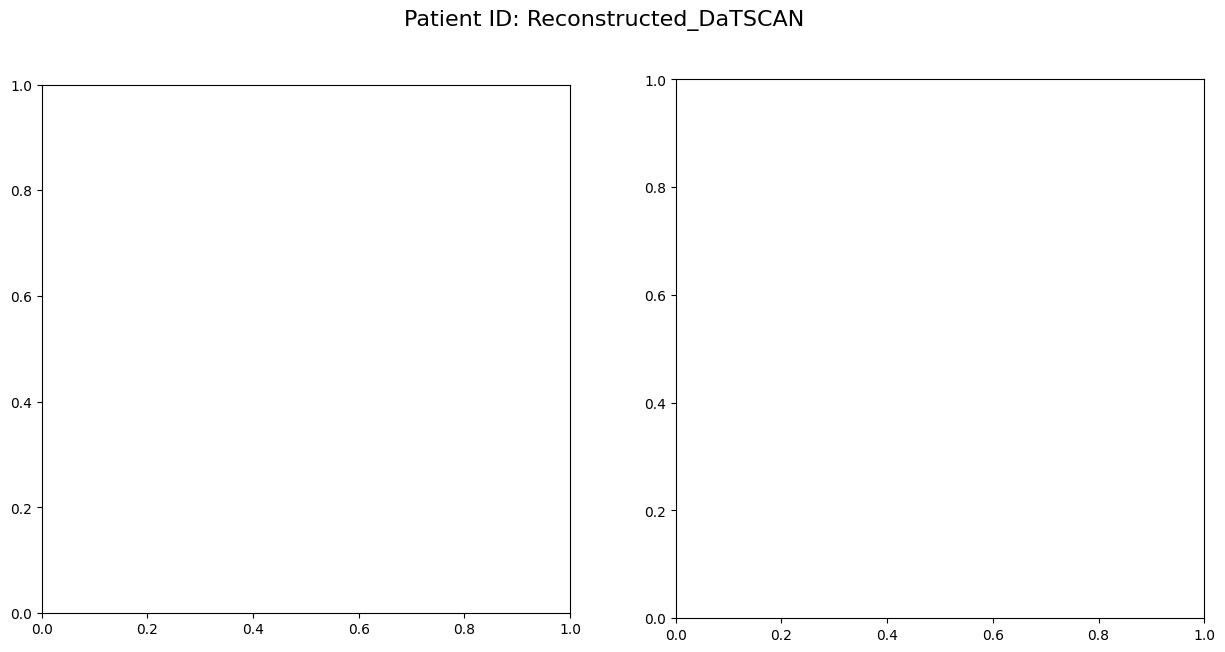

In [3]:
viewer = DICOMViewer("./Images_Test/dicom")
viewer.load_and_display_images(max_images=1, debug=True)  # Start with just one image to test

Searching for DICOM files...


100%|██████████| 2/2 [00:00<00:00, 273.64it/s]


Found 6 DICOM files


Processing DICOM files:   0%|          | 0/1 [00:00<?, ?it/s]


DICOM File Information:
--------------------------------------------------
Transfer Syntax UID: 1.2.840.10008.1.2.1
Modality: NM
Image Type: ['DERIVED', 'PRIMARY', 'RECON TOMO', 'EMISSION']
Manufacturer: PMOD Technologies
Pixel Data Shape: (91, 109, 91)
Bits Allocated: 16
Bits Stored: 16
High Bit: 15
Pixel Representation: 1
--------------------------------------------------


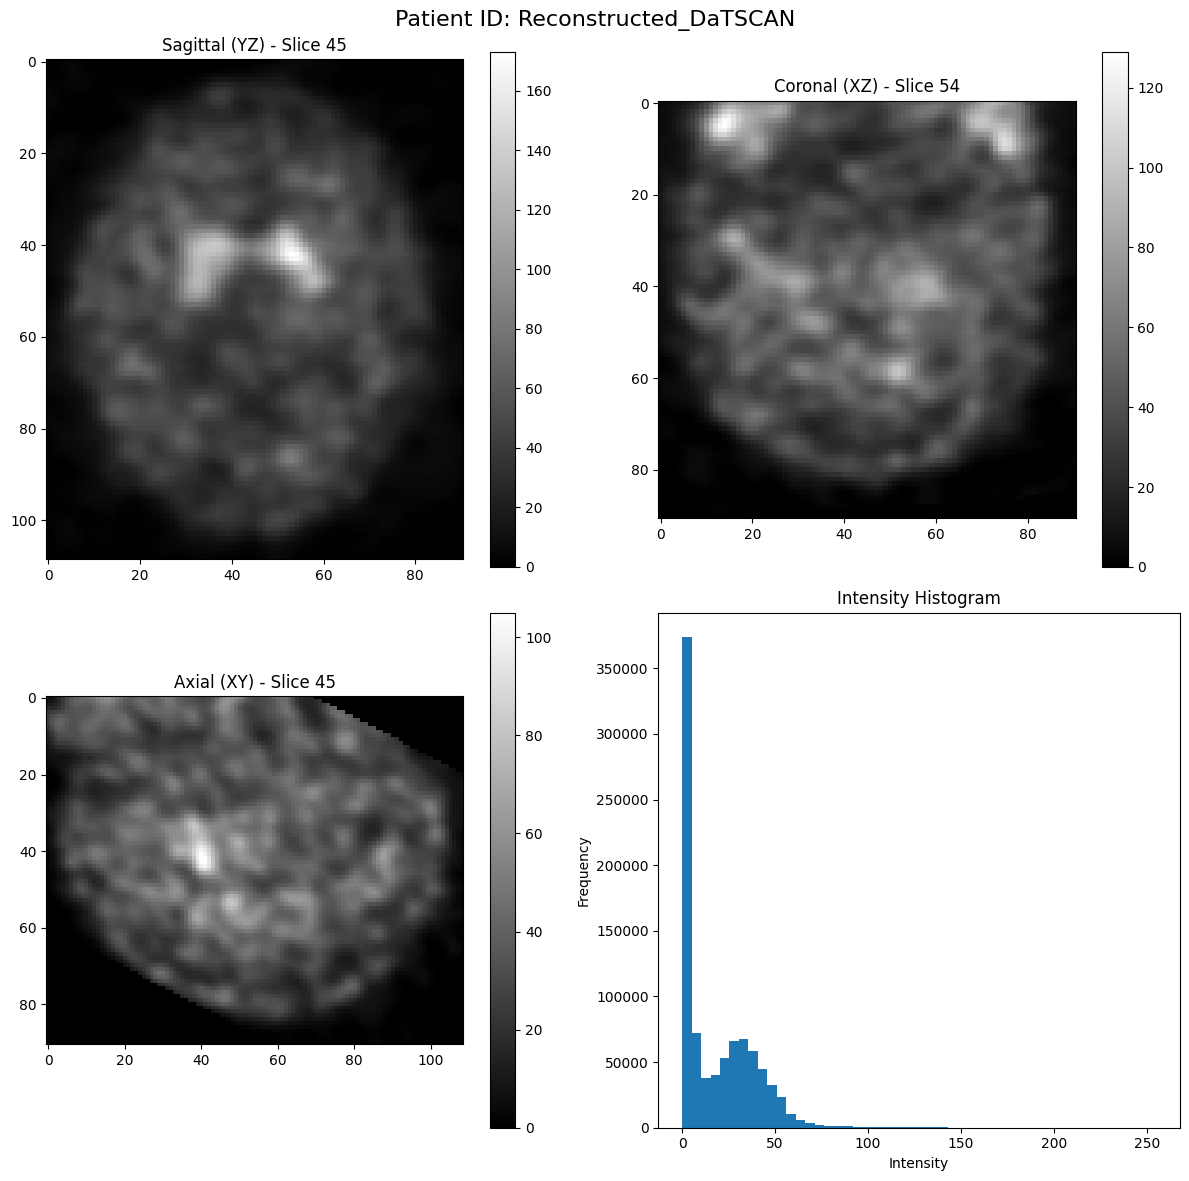

Processing DICOM files: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


In [4]:
import os
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

class DICOMViewer:
    def __init__(self, base_path):
        self.base_path = Path(base_path)
        self.dicom_files = []
        
    def find_dicom_files(self):
        print("Searching for DICOM files...")
        for patient_folder in tqdm(list(self.base_path.iterdir())):
            if patient_folder.is_dir():
                for file_path in patient_folder.rglob("*"):
                    if file_path.is_file() and file_path.suffix.lower() in ['.dcm', '.ima']:
                        self.dicom_files.append(file_path)
        
        print(f"Found {len(self.dicom_files)} DICOM files")
        
    def process_dicom_volume(self, ds):
        """
        Process 3D DICOM volume data
        
        Parameters:
        -----------
        ds : pydicom.dataset.FileDataset
            The DICOM dataset
            
        Returns:
        --------
        numpy.ndarray
            Processed 3D volume data
        """
        try:
            volume = ds.pixel_array
            
            # Normalize the volume for display
            if volume.max() - volume.min() != 0:
                volume = ((volume - volume.min()) / (volume.max() - volume.min()) * 255).astype(np.uint8)
            
            return volume
            
        except Exception as e:
            print(f"Error processing volume data: {str(e)}")
            return None

    def display_3d_volume(self, volume, title=""):
        """
        Display three orthogonal slices of a 3D volume
        
        Parameters:
        -----------
        volume : numpy.ndarray
            3D volume data
        title : str
            Title for the plot
        """
        if len(volume.shape) != 3:
            print(f"Expected 3D volume, got shape {volume.shape}")
            return
            
        # Get middle slices for each axis
        x_mid = volume.shape[0] // 2
        y_mid = volume.shape[1] // 2
        z_mid = volume.shape[2] // 2
        
        # Create the figure
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))
        fig.suptitle(title, fontsize=16)
        
        # Sagittal view (YZ plane)
        im1 = axes[0, 0].imshow(volume[x_mid, :, :], cmap='gray')
        axes[0, 0].set_title(f'Sagittal (YZ) - Slice {x_mid}')
        plt.colorbar(im1, ax=axes[0, 0])
        
        # Coronal view (XZ plane)
        im2 = axes[0, 1].imshow(volume[:, y_mid, :], cmap='gray')
        axes[0, 1].set_title(f'Coronal (XZ) - Slice {y_mid}')
        plt.colorbar(im2, ax=axes[0, 1])
        
        # Axial view (XY plane)
        im3 = axes[1, 0].imshow(volume[:, :, z_mid], cmap='gray')
        axes[1, 0].set_title(f'Axial (XY) - Slice {z_mid}')
        plt.colorbar(im3, ax=axes[1, 0])
        
        # Add histogram in the fourth subplot
        axes[1, 1].hist(volume.ravel(), bins=50)
        axes[1, 1].set_title('Intensity Histogram')
        axes[1, 1].set_xlabel('Intensity')
        axes[1, 1].set_ylabel('Frequency')
        
        plt.tight_layout()
        return fig

    def print_dicom_info(self, ds):
        """Print detailed DICOM file information"""
        print("\nDICOM File Information:")
        print("-" * 50)
        print(f"Transfer Syntax UID: {ds.file_meta.TransferSyntaxUID}")
        print(f"Modality: {getattr(ds, 'Modality', 'N/A')}")
        print(f"Image Type: {getattr(ds, 'ImageType', 'N/A')}")
        print(f"Manufacturer: {getattr(ds, 'Manufacturer', 'N/A')}")
        print(f"Pixel Data Shape: {ds.pixel_array.shape if hasattr(ds, 'pixel_array') else 'N/A'}")
        print(f"Bits Allocated: {getattr(ds, 'BitsAllocated', 'N/A')}")
        print(f"Bits Stored: {getattr(ds, 'BitsStored', 'N/A')}")
        print(f"High Bit: {getattr(ds, 'HighBit', 'N/A')}")
        print(f"Pixel Representation: {getattr(ds, 'PixelRepresentation', 'N/A')}")
        print("-" * 50)
            
    def load_and_display_volumes(self, max_images=None, debug=True):
        """
        Load and display 3D DICOM volumes
        
        Parameters:
        -----------
        max_images : int, optional
            Maximum number of volumes to display
        debug : bool, optional
            If True, print detailed DICOM information
        """
        if not self.dicom_files:
            self.find_dicom_files()
            
        if not self.dicom_files:
            print("No DICOM files found!")
            return
            
        files_to_process = self.dicom_files[:max_images] if max_images else self.dicom_files
        
        for dicom_path in tqdm(files_to_process, desc="Processing DICOM files"):
            try:
                # Load the DICOM file
                ds = pydicom.dcmread(dicom_path, force=True)
                
                if debug:
                    self.print_dicom_info(ds)
                
                # Process the volume
                volume = self.process_dicom_volume(ds)
                
                if volume is None:
                    print(f"Failed to process volume from {dicom_path}")
                    continue
                
                # Display the volume
                patient_id = dicom_path.parts[-4]
                fig = self.display_3d_volume(volume, f"Patient ID: {patient_id}")
                plt.show()
                
            except Exception as e:
                print(f"Error processing {dicom_path}: {str(e)}")
                continue

def main():
    # Replace with your actual path to the "dicom" folder
    dicom_base_path = "./Images_Test/dicom"
    
    # Create viewer instance
    viewer = DICOMViewer(dicom_base_path)
    
    # Load and display volumes
    viewer.load_and_display_volumes(max_images=1, debug=True)

if __name__ == "__main__":
    main()